In [1]:
# DATA PREPROCESSING 


In [178]:
import pandas as pd
# This line imports the `stopwords` module from the Natural Language Toolkit (NLTK) library. 
#Stopwords are common words in a language (like "the", "is", "in", etc.)
#that are often removed in text processing because they carry less meaningful information.
from nltk.corpus import stopwords
# take a string, split it by spaces perform the lemmetization (run from running, better to good (its root format)) then connect it back
from nltk.stem import WordNetLemmatizer


In [141]:
# this we just have to do it once in an enviournment


import nltk  # Import the nltk library

nltk.download('stopwords')  # Now you can download the stopwords
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [180]:

df = pd.read_csv('instagram_comments.csv', encoding='latin1')

df

,created_at,text,username
0,1735559166,My Instagram pages are private and closed and ...,aqeede_
1,1735559196,My Instagram pages are private and closed and ...,aqeede_
2,1735559888,He underestimated the stupidity of Your voters...,topdressurpferde
3,1735560204,The one who threatens you takes away the prosp...,aqeede_
4,1735560271,The one who threatens you takes away the prosp...,afshar_mohamadtaghi
...,...,...,...
14662,1735246427,??????????,cobrathebadest
14663,1735246428,MAGA,dally510_
14664,1735246429,??,daniel_lee2005
14665,1735246429,Is my Last Post Fire? Or should I Delete it? ??,killerdashh


In [182]:
column_to_delete = 'created_at'
df.drop(columns=[column_to_delete], inplace = True)
print('column deleted')


column deleted


In [184]:
df

,text,username
0,My Instagram pages are private and closed and ...,aqeede_
1,My Instagram pages are private and closed and ...,aqeede_
2,He underestimated the stupidity of Your voters...,topdressurpferde
3,The one who threatens you takes away the prosp...,aqeede_
4,The one who threatens you takes away the prosp...,afshar_mohamadtaghi
...,...,...
14662,??????????,cobrathebadest
14663,MAGA,dally510_
14664,??,daniel_lee2005
14665,Is my Last Post Fire? Or should I Delete it? ??,killerdashh


In [186]:
df.isnull().sum()

text        460
username      0
dtype: int64

In [188]:
null_comments = df[df.isnull().any(axis=1)]

# Display the rows with null values
print("\nRows with Null Values:")
print(null_comments)


Rows with Null Values:
      text              username
51     NaN         rowan_hardin_
103    NaN           cookerywolf
137    NaN            satansbaal
147    NaN  mostly_peaceful_1776
227    NaN           ye.boy.john
...    ...                   ...
14629  NaN            sidar_7362
14636  NaN        tigerteethtony
14649  NaN            sidar_7362
14650  NaN           nott._.antt
14661  NaN        tigerteethtony

[460 rows x 2 columns]


In [206]:

# Remove rows with null values from the original dataset
df_cleaned = df.dropna()
df = df_cleaned
df.isnull().sum()

text        0
username    0
dtype: int64

In [208]:


# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df_cleaned)

# Save the null comments to a separate dataset
null_comments.to_csv('null_comments_trum_14k.csv', index=False)

print("\nRows with null values have been saved to 'null_comments.csv'.")



Cleaned Dataset:
                                                    text             username
0      My Instagram pages are private and closed and ...              aqeede_
1      My Instagram pages are private and closed and ...              aqeede_
2      He underestimated the stupidity of Your voters...     topdressurpferde
3      The one who threatens you takes away the prosp...              aqeede_
4      The one who threatens you takes away the prosp...  afshar_mohamadtaghi
...                                                  ...                  ...
14662                                         ??????????       cobrathebadest
14663                                               MAGA            dally510_
14664                                                 ??       daniel_lee2005
14665   Is my Last Post Fire?  Or should I Delete it? ??          killerdashh
14666                                          Twice lol             siona_va

[14207 rows x 2 columns]

Rows with null valu

In [220]:


# Check if there are any null values remaining
null_check = df_cleaned.isnull().sum()
# Display the cleaned DataFrame and the null check
print("\nCleaned DataFrame:")
print(df)
print("\nCumulative sum of null values (should be 0):")
print(null_check)


Cleaned DataFrame:
                                                    text             username
0      My Instagram pages are private and closed and ...              aqeede_
1      My Instagram pages are private and closed and ...              aqeede_
2      He underestimated the stupidity of Your voters...     topdressurpferde
3      The one who threatens you takes away the prosp...              aqeede_
4      The one who threatens you takes away the prosp...  afshar_mohamadtaghi
...                                                  ...                  ...
14662                                         ??????????       cobrathebadest
14663                                               MAGA            dally510_
14664                                                 ??       daniel_lee2005
14665   Is my Last Post Fire?  Or should I Delete it? ??          killerdashh
14666                                          Twice lol             siona_va

[14207 rows x 2 columns]

Cumulative sum of

In [222]:
#converted the comemnts from normal caps to small caps
df['text'] = df['text'].str.lower()

In [224]:
print(df)


                                                    text             username
0      my instagram pages are private and closed and ...              aqeede_
1      my instagram pages are private and closed and ...              aqeede_
2      he underestimated the stupidity of your voters...     topdressurpferde
3      the one who threatens you takes away the prosp...              aqeede_
4      the one who threatens you takes away the prosp...  afshar_mohamadtaghi
...                                                  ...                  ...
14662                                         ??????????       cobrathebadest
14663                                               maga            dally510_
14664                                                 ??       daniel_lee2005
14665   is my last post fire?  or should i delete it? ??          killerdashh
14666                                          twice lol             siona_va

[14207 rows x 2 columns]


In [226]:
# Remove punctuations and numbers from the 'text' column
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuations
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)      # Remove numbers

# Display the cleaned DataFrame
print("\nCleaned DataFrame (text column):")
print(df['text'])


Cleaned DataFrame (text column):
0        my instagram pages are private and closed and ...
1        my instagram pages are private and closed and ...
2        he underestimated the stupidity of your voters...
3        the one who threatens you takes away the prosp...
4        the one who threatens you takes away the prosp...
                               ...                        
14662                                                     
14663                                                 maga
14664                                                     
14665         is my last post fire  or should i delete it 
14666                                            twice lol
Name: text, Length: 14207, dtype: object


In [8]:
#starting of nlp 

In [232]:
#Here, we create a set called `stop` that contains all the English stopwords provided by NLTK.
#Using a set allows for faster membership testing when checking if a word is a stopword.
stop = set(stopwords.words('english'))

In [238]:
#- This line processes the `text` column of the DataFrame `df`:
 # - `df['text'].apply(...)`: This applies a function to each element in the `text` column.
  #- `lambda x: ...`: This defines an anonymous function that takes a single argument `x`, which represents each text entry in the column.
  # `x.split()`: This splits the text into individual words based on whitespace.
  #- `[word for word in x.split() if word not in stop]`: This is a list comprehension that iterates over each word in the split text and includes it in the new list only if it is not in the `stop` set (i.e., it is not a stopword).
  #- `' '.join(...)`: This joins the filtered list of words back into a single string, with words separated by spaces.
#- Finally, the processed text (with stopwords removed) replaces the original text in the `text` column of the DataFrame.

### Suggestions:
#1. **Ensure NLTK is Installed**: Make sure you have the NLTK library installed and the stopwords downloaded. You can do this by running:

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

In [240]:
  # This line downloads the WordNet resource

In [242]:


lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


In [244]:
df['text'] = df['text'].str.replace(r'http\S+|www\S+|@\S+', '', regex=True)


In [246]:
# to remove extra spaces

df['text'] = df['text'].str.strip().str.replace(r'\s+', ' ', regex=True)


In [248]:
df.to_csv('cleaned_instagram_comments.csv', index=False)

In [250]:
df2 = pd.read_csv('cleaned_instagram_comments.csv')
df2 = df2.dropna()
df2

,text,username
0,instagram page private closed cannot viewed pu...,aqeede_
1,instagram page private closed cannot viewed pu...,aqeede_
2,underestimated stupidity voter believing lie,topdressurpferde
3,one threatens take away prosperity security jo...,aqeede_
4,one threatens take away prosperity security jo...,afshar_mohamadtaghi
...,...,...
14198,lol love,real__desmond
14200,lmao,seancmccrossen
14203,maga,dally510_
14205,last post fire delete,killerdashh


In [254]:
#####################################################################33

#actual sentiment analysis here

In [256]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [258]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [260]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [266]:
# Function to analyze sentiment
def analyze_sentiment_vader(text):
    score = analyzer.polarity_scores(text)  # Get sentiment scores
    return score  # Return the entire sentiment dictionary for detailed analysis

# Apply the function to the 'cleaned_text' column
df['sentiment_scores'] = df['text'].apply(analyze_sentiment_vader)

# Split the scores into separate columns
df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['neutral'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])


In [268]:
df

,text,username,sentiment_scores,positive,neutral,negative,compound
0,instagram page private closed cannot viewed pu...,aqeede_,"{'neg': 0.221, 'neu': 0.529, 'pos': 0.25, 'com...",0.250,0.529,0.221,0.6022
1,instagram page private closed cannot viewed pu...,aqeede_,"{'neg': 0.221, 'neu': 0.529, 'pos': 0.25, 'com...",0.250,0.529,0.221,0.6022
2,underestimated stupidity voter believing lie,topdressurpferde,"{'neg': 0.625, 'neu': 0.375, 'pos': 0.0, 'comp...",0.000,0.375,0.625,-0.6124
3,one threatens take away prosperity security jo...,aqeede_,"{'neg': 0.114, 'neu': 0.684, 'pos': 0.202, 'co...",0.202,0.684,0.114,0.9623
4,one threatens take away prosperity security jo...,afshar_mohamadtaghi,"{'neg': 0.114, 'neu': 0.684, 'pos': 0.202, 'co...",0.202,0.684,0.114,0.9623
...,...,...,...,...,...,...,...
14662,,cobrathebadest,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000
14663,maga,dally510_,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
14664,,daniel_lee2005,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000
14665,last post fire delete,killerdashh,"{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...",0.000,0.556,0.444,-0.3400


In [270]:
# Define sentiment labels
def sentiment_label(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment labeling
df['sentiment_label'] = df['compound'].apply(sentiment_label)


In [272]:
filename = 'sentiment_analysis_results_after.csv'

# Save the DataFrame to a CSV file
df.to_csv(filename, index=False) 

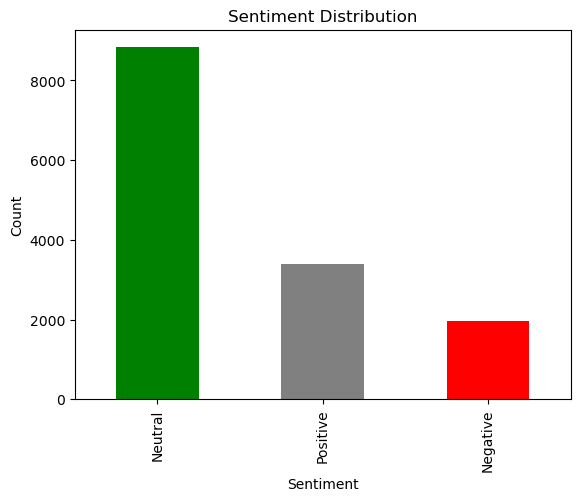

In [274]:

import matplotlib.pyplot as plt

# Plot sentiment distribution
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


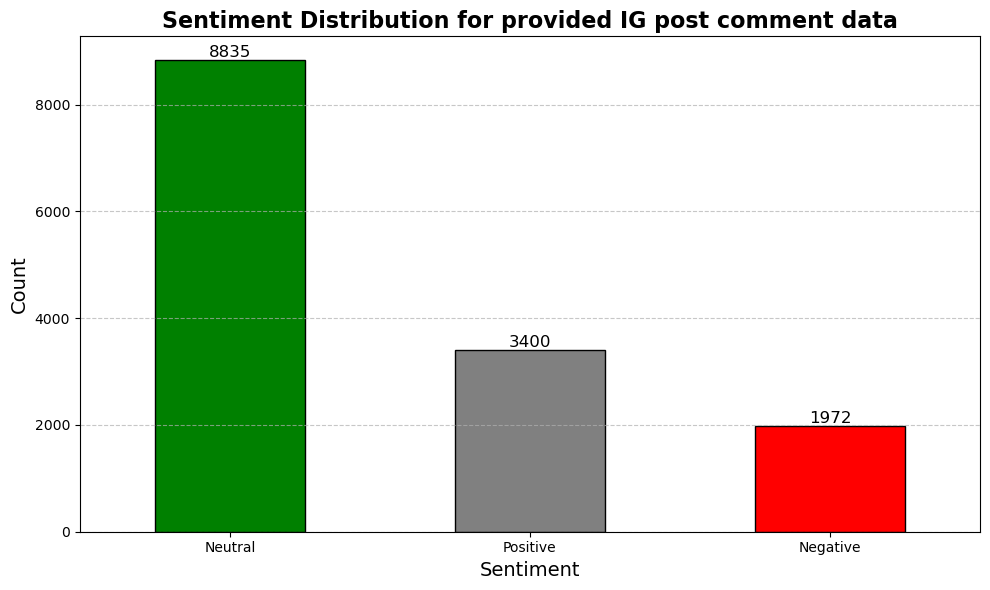

In [281]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot sentiment distribution with improved aesthetics
ax = df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'], edgecolor='black')

# Add title and labels
plt.title('Sentiment Distribution for provided IG post comment data', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Show the plot
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [283]:
# Save the plot to the system
file_name = "sine_wave_plot.png"  # Change the file name and extension as needed
plt.savefig(file_name, dpi=300, bbox_inches='tight')  # Save the plot with high resolution
print(f"Plot saved as {file_name}")

Plot saved as sine_wave_plot.png


<Figure size 640x480 with 0 Axes>